https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv


Hello readers, I am sure that you all pay for your insurance and get medical service. So, I would like to analysis the dataset called "medical cost" and introduce what kind of people pay more medical cost. Moreover, I would like to find out what kind of people have unhealthy or healthy lifestyle or consition such as smoking and bmi. 

My contents are:
    Loading dataset and explanetion of it,
    introduction of my reserch questions,
    data visualization,
    answering the reserch questions (EDA)
    wrap up my analysis

So first, I would like to load the dataset and give it a name "medical_cost"

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
medical_cost = pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")

In [28]:
medical_cost

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


So, this the dataset called "medical cost". It has age, sex, bmi, how many people the example pay for their medical service, if they smoke or not, and where they live and their charges for medical service. As you can see, we have 1338 examples.

In [29]:
medical_cost=(medical_cost
              .dropna()
              .rename(columns={'charges': 'cost'})
              .reset_index()
              .drop(columns=['index'])
              .sort_values(by=['age'])
              )

In [30]:
medical_cost

,age,sex,bmi,children,smoker,region,cost
1248,18,female,39.820,0,no,southeast,1633.96180
482,18,female,31.350,0,no,southeast,1622.18850
492,18,female,25.080,0,no,northeast,2196.47320
525,18,female,33.880,0,no,southeast,11482.63485
529,18,male,25.460,0,no,northeast,1708.00140
...,...,...,...,...,...,...,...
398,64,male,25.600,2,no,southwest,14988.43200
335,64,male,34.500,0,no,southwest,13822.80300
378,64,female,30.115,3,no,northwest,16455.70785
1265,64,male,23.760,0,yes,southeast,26926.51440


In [31]:
def cleaning(data):
    data=(data
              .dropna()
              .rename(columns={'charges': 'cost'})
              .reset_index()
              .drop(columns=['index'])
              .sort_values(by=['age'])
              )

dont have to drop if it's numerical
drop if it is text, negative or null

This is my method chaining

In [32]:
#On,March 17 I worked with my TA and we could not figure out how to solve this error.

#from scripts import project_function

#medical_cost=project_function.cleaning(medical_cost)
#medical_cost

I am interested in which column is strongly related to medical cost.(This question aomes from Milestone 1.)
I predict smoking, bmi, number of children and age are strongly related to the cost. 

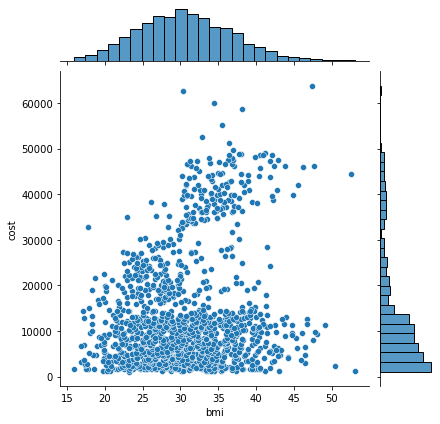

In [33]:
sns.jointplot(data=medical_cost,x="bmi",y="cost")

Many examples seems to be placed between 0 to 14000 and as the bmi increases, I can see the smaller groups of example appear above 15000. I see a group above around 15000 between bmi 23 and 31 but I do not see many examples between less than 20 and 23. Also, between bmi 30 and bmi 40, I find a large group above chaeges 30000 and this group is placed higher than the group between bmi 20 and 23. However, it is also true that many examples are between 20 and 40, and many of them pay between 0 and less than 15000.

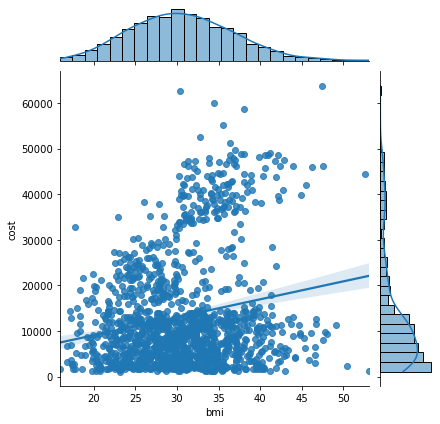

In [34]:
sns.jointplot(data=medical_cost,x="bmi",y="cost",kind='reg')

This is a jointplot with a slope. The slope tells me there is a positive relationship between bmi and chrage. But I decided to state there could be a positive relationship between bmi and charges. 

Now, I would like to see if there is a relationship between the cost and smoking. 

<AxesSubplot:xlabel='smoker', ylabel='cost'>

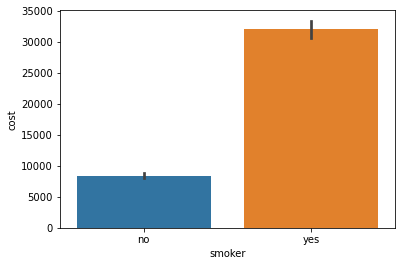

In [35]:
sns.barplot(data=medical_cost,y="cost",x="smoker")

Bar plot shows the avarage of the data and sometimes it is not relevant to trust them. However, here is obvious that smokers pay more tha non-smokers do. The average cost of non-smoker is around 8000 and the everage of smorkers is around 32500.

Visualization of children and cost

<AxesSubplot:xlabel='children', ylabel='cost'>

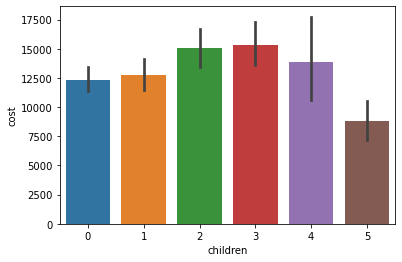

In [36]:
sns.barplot(data=medical_cost,y="cost",x="children")

This is the bar plot of the reprensentation of cost and number of children. As it shows, there is neither of positive or negative relationship between number of children and cost. It is easy to conclude that there is no relationship between number of children and cost. 

I also would like to see if their age affects to their medical cost. 

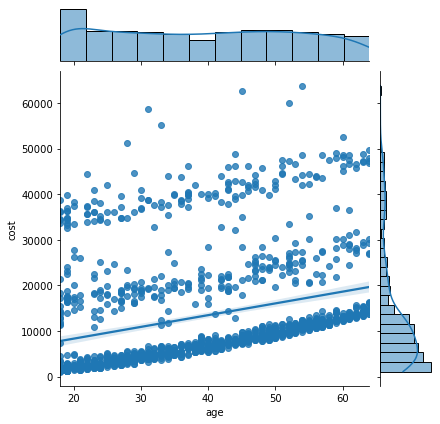

In [37]:
sns.jointplot(data=medical_cost, y="cost",x="age",kind='reg')

I found this visualization is interesting since I see three groups of people: the biggest group on the bottom lies between 0 to over 10000, the second biggest group is above 10000 and over 20000, and finally the third biggest group between around 30000 and around 50000. And the all of the groups has gradual positive slope. So I would say, in any age, there are some people who pay extra cost than others who is about the same age. I am sure that I can tell you there is a positive 
effect to the cost but there might be more than positive relationship. 

So, now I found out smoking has the biggest eccect on the cost. So Iwould like to see the difference betweensmokers and non-smokers. To do that, I create two sub-datasets: one contains only smokers and pther contains only non-smokers.

In [42]:
smokers=medical_cost.drop(medical_cost[medical_cost['smoker']=='no'].index)
smokers

,age,sex,bmi,children,smoker,region,cost
623,18,male,33.535,0,yes,northeast,34617.84065
57,18,male,31.680,2,yes,southeast,34303.16720
1282,18,female,21.660,0,yes,northeast,14283.45940
759,18,male,38.170,0,yes,southeast,36307.79830
157,18,male,25.175,0,yes,northeast,15518.18025
...,...,...,...,...,...,...,...
664,64,female,22.990,0,yes,southeast,27037.91410
890,64,female,26.885,0,yes,northwest,29330.98315
420,64,male,33.880,0,yes,southeast,46889.26120
328,64,female,33.800,1,yes,southwest,47928.03000


In [50]:
non_smokers=medical_cost.drop(medical_cost[medical_cost['smoker']=='yes'].index)
non_smokers

,age,sex,bmi,children,smoker,region,cost
1248,18,female,39.820,0,no,southeast,1633.96180
482,18,female,31.350,0,no,southeast,1622.18850
492,18,female,25.080,0,no,northeast,2196.47320
525,18,female,33.880,0,no,southeast,11482.63485
529,18,male,25.460,0,no,northeast,1708.00140
...,...,...,...,...,...,...,...
402,64,female,32.965,0,no,northwest,14692.66935
398,64,male,25.600,2,no,southwest,14988.43200
335,64,male,34.500,0,no,southwest,13822.80300
378,64,female,30.115,3,no,northwest,16455.70785


<AxesSubplot:xlabel='bmi', ylabel='Density'>

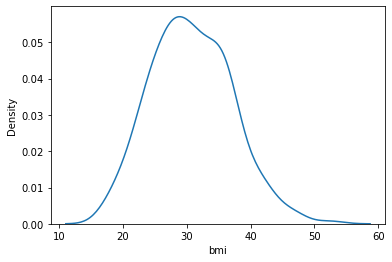

In [51]:
sns.kdeplot(smokers['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

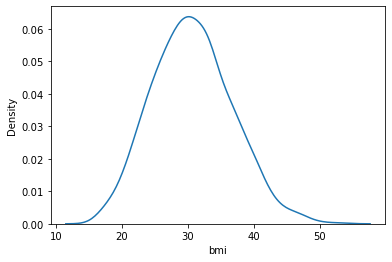

In [52]:
sns.kdeplot(non_smokers['bmi'])

So smokers and non-smokers have similar bmi. It means, smokers tend to have different body mass from non-smokers.


<AxesSubplot:xlabel='children', ylabel='Density'>

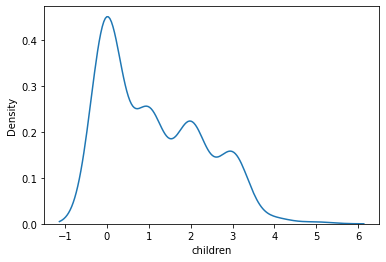

In [54]:
sns.kdeplot(smokers['children'])

<AxesSubplot:xlabel='children', ylabel='Density'>

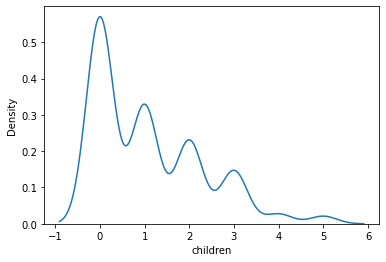

In [55]:
sns.kdeplot(non_smokers['children'])

The number of children also the same. People from both group have similar number of children. 

How about smoker and ages

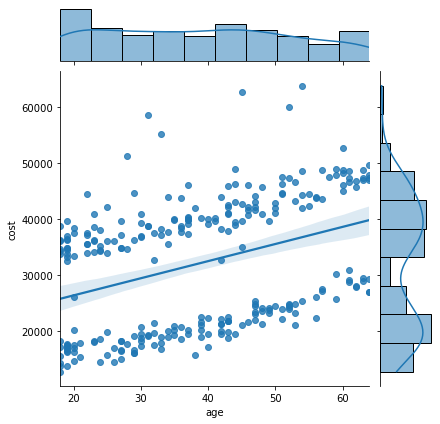

In [57]:
sns.jointplot(data=smokers, y="cost",x="age",kind='reg')

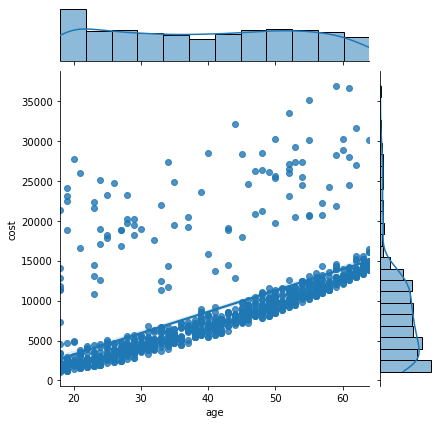

In [58]:
sns.jointplot(data=non_smokers, y="cost",x="age",kind='reg')